In [1]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import linear_model, metrics
from sklearn.model_selection import cross_val_score
import os 
from matplotlib import pyplot as plt
import pickle
import seaborn as sb
import pandas as pd
import numpy as np
from scipy import stats
import sys
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_stats

In [2]:
df = pd.read_pickle("XGB_all_ch_comb_ECOG_STN_ECOGSTN_samesize.p")

In [3]:
df.to_csv("XGB_all_ch_comb_ECOG_STN_ECOGSTN_samesize.csv")

In [3]:
s_bestECOGbestSTN_CON = str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "best ECOG + best STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "best ECOG + best STN")]["r2"].std(),2))
s_bestECOGbestSTN_IPS = str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "best ECOG + best STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "best ECOG + best STN")]["r2"].std(),2))           

In [4]:
s_ECOG_CON = str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "ECOG")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "ECOG")]["r2"].std(),2))
s_ECOG_IPS = str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "ECOG")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "ECOG")]["r2"].std(),2))
s_STN_CON = str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "STN")]["r2"].std(),2))
s_STN_IPS = str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "STN")]["r2"].std(),2)) 
s_ECOGSTN_CON = str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "ECOG_STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "ECOG_STN")]["r2"].std(),2))
s_ECOGSTN_IPS = str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "ECOG_STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "ECOG_STN")]["r2"].std(),2))           

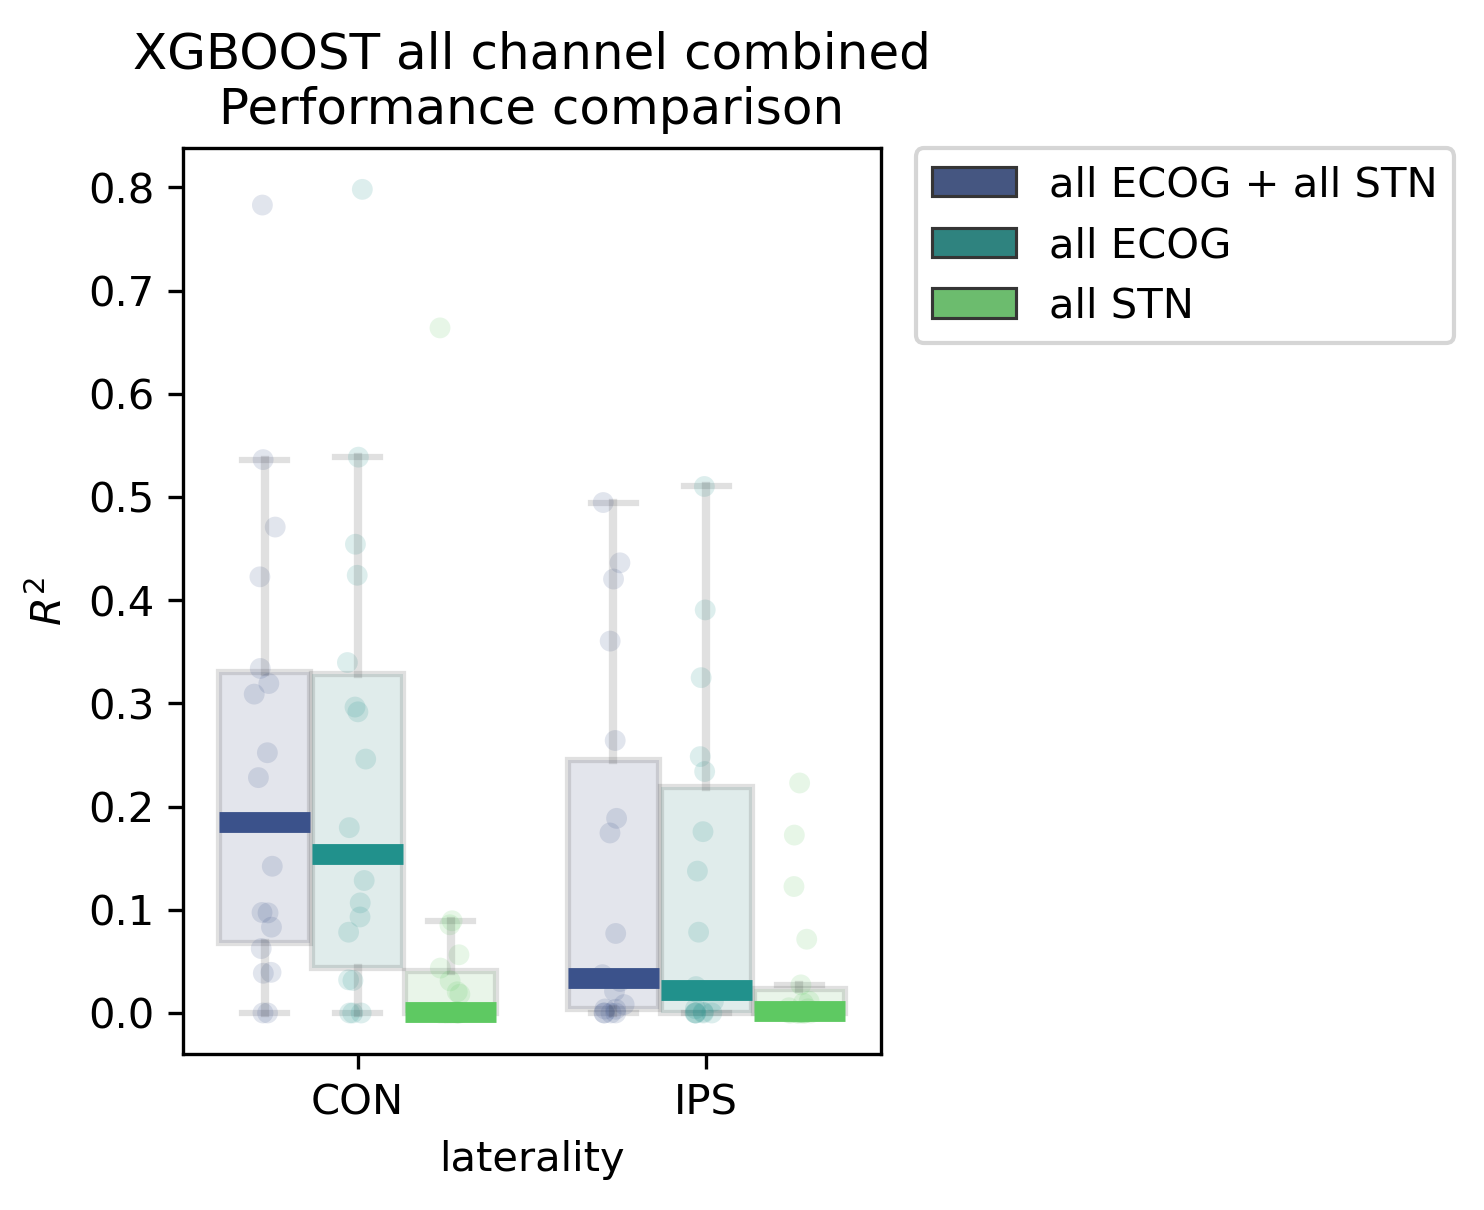

In [8]:
alpha_box = 0.15
plt.figure(figsize=(3,4), dpi=300)
sb.boxplot(x="lat", y="r2", hue="loc", order=["CON", "IPS"], hue_order=["ECOG_STN", \
                                                                "ECOG", "STN"], data=df,
           palette="viridis", 
           showmeans=False, boxprops=dict(alpha=alpha_box), showcaps=True, showbox=True, 
           showfliers=False, notch=False,
           whiskerprops={'linewidth':2, "zorder":10, "alpha":alpha_box},
           capprops={"alpha":alpha_box},
           medianprops=dict(linestyle='-.', linewidth=5, color="gray", alpha=0.0124))

    
ax = sb.stripplot(x="lat", y="r2", hue="loc", order=["CON", "IPS"], hue_order=["ECOG_STN", \
                                                                               "ECOG", "STN"],
             data=df, palette="viridis", dodge=True, s=5, alpha=alpha_box)

hue_colors = sb.color_palette("viridis", df["loc"].unique().shape[0])

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))

switch_ = 0
for line in ax.lines:
    if line.get_alpha() == 0.0124:
        
        line.set_color(hue_colors[switch_])
        switch_ += 1
        
        if switch_ >= len(hue_colors):
            switch_ = 0
            
        line.set_alpha(1)


# When creating the legend, only use the first two elements
# to effectively remove the last two.
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['all ECOG + all STN', 'all ECOG', 'all STN'], \
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("XGBOOST all channel combined\nPerformance comparison")
plt.ylabel(r"$R^2$")
plt.xlabel("laterality")

plt.savefig("Figure 4 B.pdf", bbox_inches='tight', dpi=300)

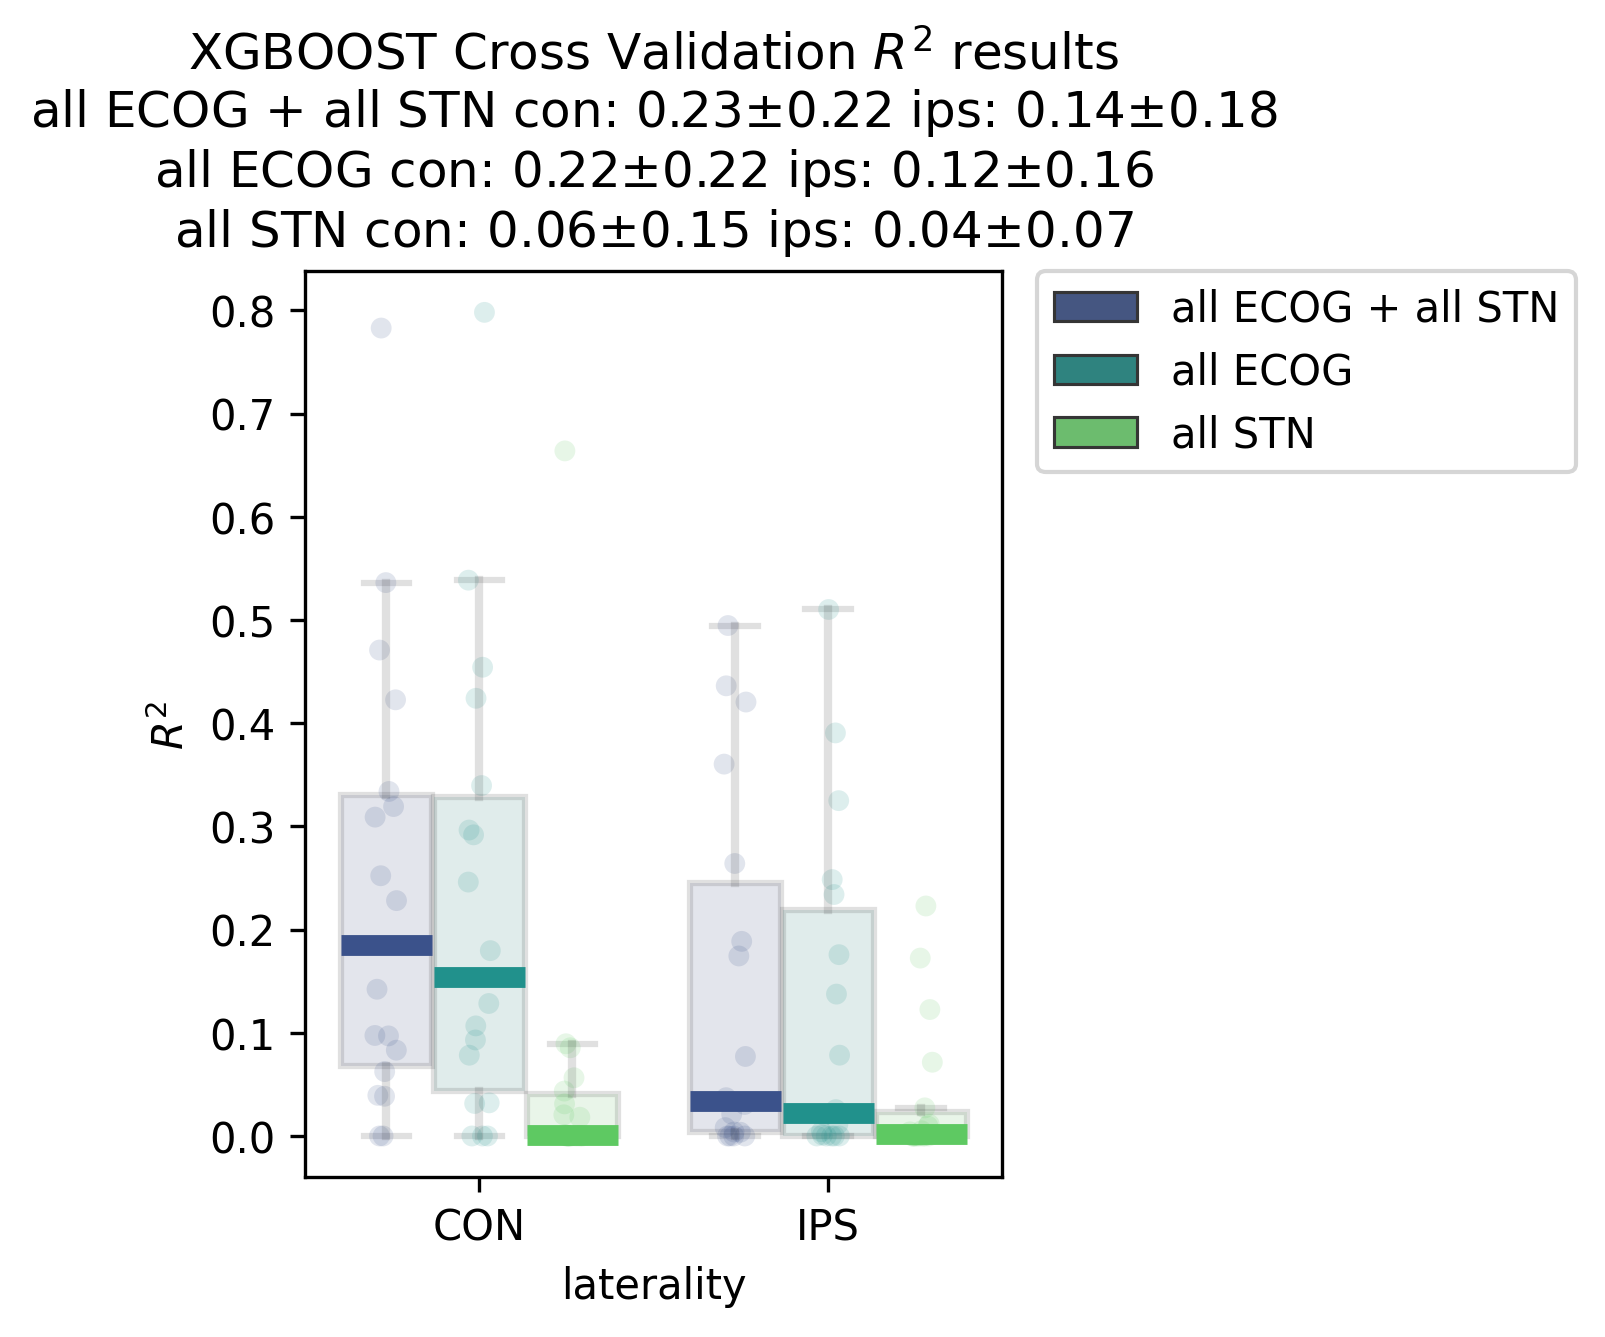

In [5]:
alpha_box = 0.15
plt.figure(figsize=(3,4), dpi=300)
sb.boxplot(x="lat", y="r2", hue="loc", order=["CON", "IPS"], hue_order=["ECOG_STN", \
                                                                "ECOG", "STN"], data=df,
           palette="viridis", 
           showmeans=False, boxprops=dict(alpha=alpha_box), showcaps=True, showbox=True, 
           showfliers=False, notch=False,
           whiskerprops={'linewidth':2, "zorder":10, "alpha":alpha_box},
           capprops={"alpha":alpha_box},
           medianprops=dict(linestyle='-.', linewidth=5, color="gray", alpha=0.0124))

    
ax = sb.stripplot(x="lat", y="r2", hue="loc", order=["CON", "IPS"], hue_order=["ECOG_STN", \
                                                                               "ECOG", "STN"],
             data=df, palette="viridis", dodge=True, s=5, alpha=alpha_box)

hue_colors = sb.color_palette("viridis", df["loc"].unique().shape[0])

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .1))

switch_ = 0
for line in ax.lines:
    if line.get_alpha() == 0.0124:
        
        line.set_color(hue_colors[switch_])
        switch_ += 1
        
        if switch_ >= len(hue_colors):
            switch_ = 0
            
        line.set_alpha(1)


# When creating the legend, only use the first two elements
# to effectively remove the last two.
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['all ECOG + all STN', 'all ECOG', 'all STN'], \
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("XGBOOST Cross Validation "+r"$R^2$"+" results"+
          "\nall ECOG + all STN con: "+s_ECOGSTN_CON+ " ips: "+s_ECOGSTN_IPS+\
          "\nall ECOG con: "+s_ECOG_CON+ " ips: "+s_ECOG_IPS+\
          "\nall STN con: "+s_STN_CON+ " ips: "+s_STN_IPS)
         
plt.ylabel(r"$R^2$")
plt.xlabel("laterality")
plt.show()

In [3]:
df

,ch_,lat,loc,r2,sub
0,ECOG_RIGHT_5,IPS,ECOG_STN,0.494603,000
1,ECOG_RIGHT_5,CON,ECOG_STN,0.782851,000
2,ECOG_LEFT_27,CON,ECOG_STN,0.536182,001
3,ECOG_LEFT_27,IPS,ECOG_STN,0.360330,001
4,ECOG_RIGHT_27,IPS,ECOG_STN,0.188588,001
...,...,...,...,...,...
103,ECOG_RIGHT_5,CON,STN,0.000000,010
104,ECOG_LEFT_5,CON,STN,0.000000,013
105,ECOG_LEFT_5,IPS,STN,0.000000,013
106,ECOG_RIGHT_5,IPS,STN,0.000000,014


In [4]:
df.query('loc=="ECOG" and lat == "CON"')

,ch_,lat,loc,r2,sub
37,ECOG_RIGHT_5,CON,ECOG,0.798065,000
38,ECOG_LEFT_27,CON,ECOG,0.538574,001
41,ECOG_RIGHT_27,CON,ECOG,0.454196,001
42,ECOG_LEFT_7,CON,ECOG,0.031492,004
45,ECOG_RIGHT_7,CON,ECOG,0.128372,004
46,ECOG_LEFT_7,CON,ECOG,0.291799,005
49,ECOG_RIGHT_7,CON,ECOG,0.000000,005
50,ECOG_LEFT_34,CON,ECOG,0.000000,006
52,ECOG_LEFT_35,CON,ECOG,0.179592,006
54,ECOG_LEFT_35,CON,ECOG,0.296444,006


In [18]:
df.query('loc=="ECOG" and lat == "CON"').groupby("sub").mean()

,r2
sub,
000,0.798065
001,0.496385
004,0.079932
005,0.145900
006,0.225038
007,0.032113
008,0.339572
009,0.000000
010,0.176358


In [13]:
df["loc"].unique()

array(['ECOG_STN', 'ECOG', 'STN'], dtype=object)